# FML LAB ASSIGNMENT #
# Name : A Ghananand #
# rollno. : 201046014 #



# Part 1 #

Download iris dataset form UCI machine learning repository and use the dataset to develop the following classifiers and find the accuracy of the model. Compare and comment on the results:

Part-1:

Decision Tree Classifier

Naïve Bayes Classifier

Logistic Regression classifier

K-NN classifier

Logistic Regression model and apply PAC

Random Forest Model

Ada Boost Model

## Importing data and data preprocessing ##

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
data = pd.read_csv('Iris.csv')

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.isnull().sum()   # No NaN values in dataset

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
print(len(data['SepalLengthCm'].unique()))
print(len(data['SepalWidthCm'].unique()))
print(len(data['PetalLengthCm'].unique()))
print(len(data['PetalWidthCm'].unique()))

35
23
43
22


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## 1. Decision Tree Classifier ##

In [ ]:
X= data.iloc[:,1:5]
y=data.iloc[:,-1]

In [ ]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.tail()

145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, dtype: object

In [ ]:
# Label encoding the categorical data #
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y=labelencoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

In [ ]:
# Fitting Dtree classification to the training set
from sklearn.tree  import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state = 0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
classifiergini = DecisionTreeClassifier(criterion= 'gini' , random_state = 0)
classifiergini.fit(X_train,y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
#Predicting the Test set Results
y_pred = classifier.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0])

In [ ]:
#Predicting the Test set Results
y_pred_gini = classifiergini.predict(X_test)
y_pred_gini

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0])

In [ ]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0,  9,  4],
       [ 0,  0,  6]])

In [ ]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_gini)
cm

array([[11,  0,  0],
       [ 0,  9,  4],
       [ 0,  0,  6]])

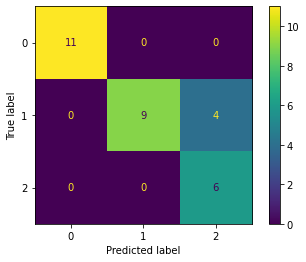

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test) 
plt.show()

In [ ]:
from sklearn import metrics
prediction = metrics.accuracy_score(y_test,y_pred)
print("Accuracy : " , prediction * 100 , "%")

Accuracy :  86.66666666666667 %


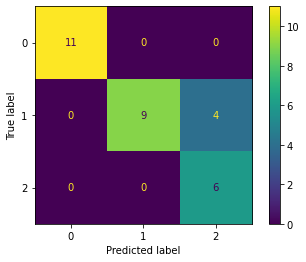

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifiergini, X_test, y_test) 
plt.show()

In [ ]:
from sklearn import metrics
prediction = metrics.accuracy_score(y_test,y_pred)
print("Accuracy : " , prediction * 100 , "%")

Accuracy :  86.66666666666667 %


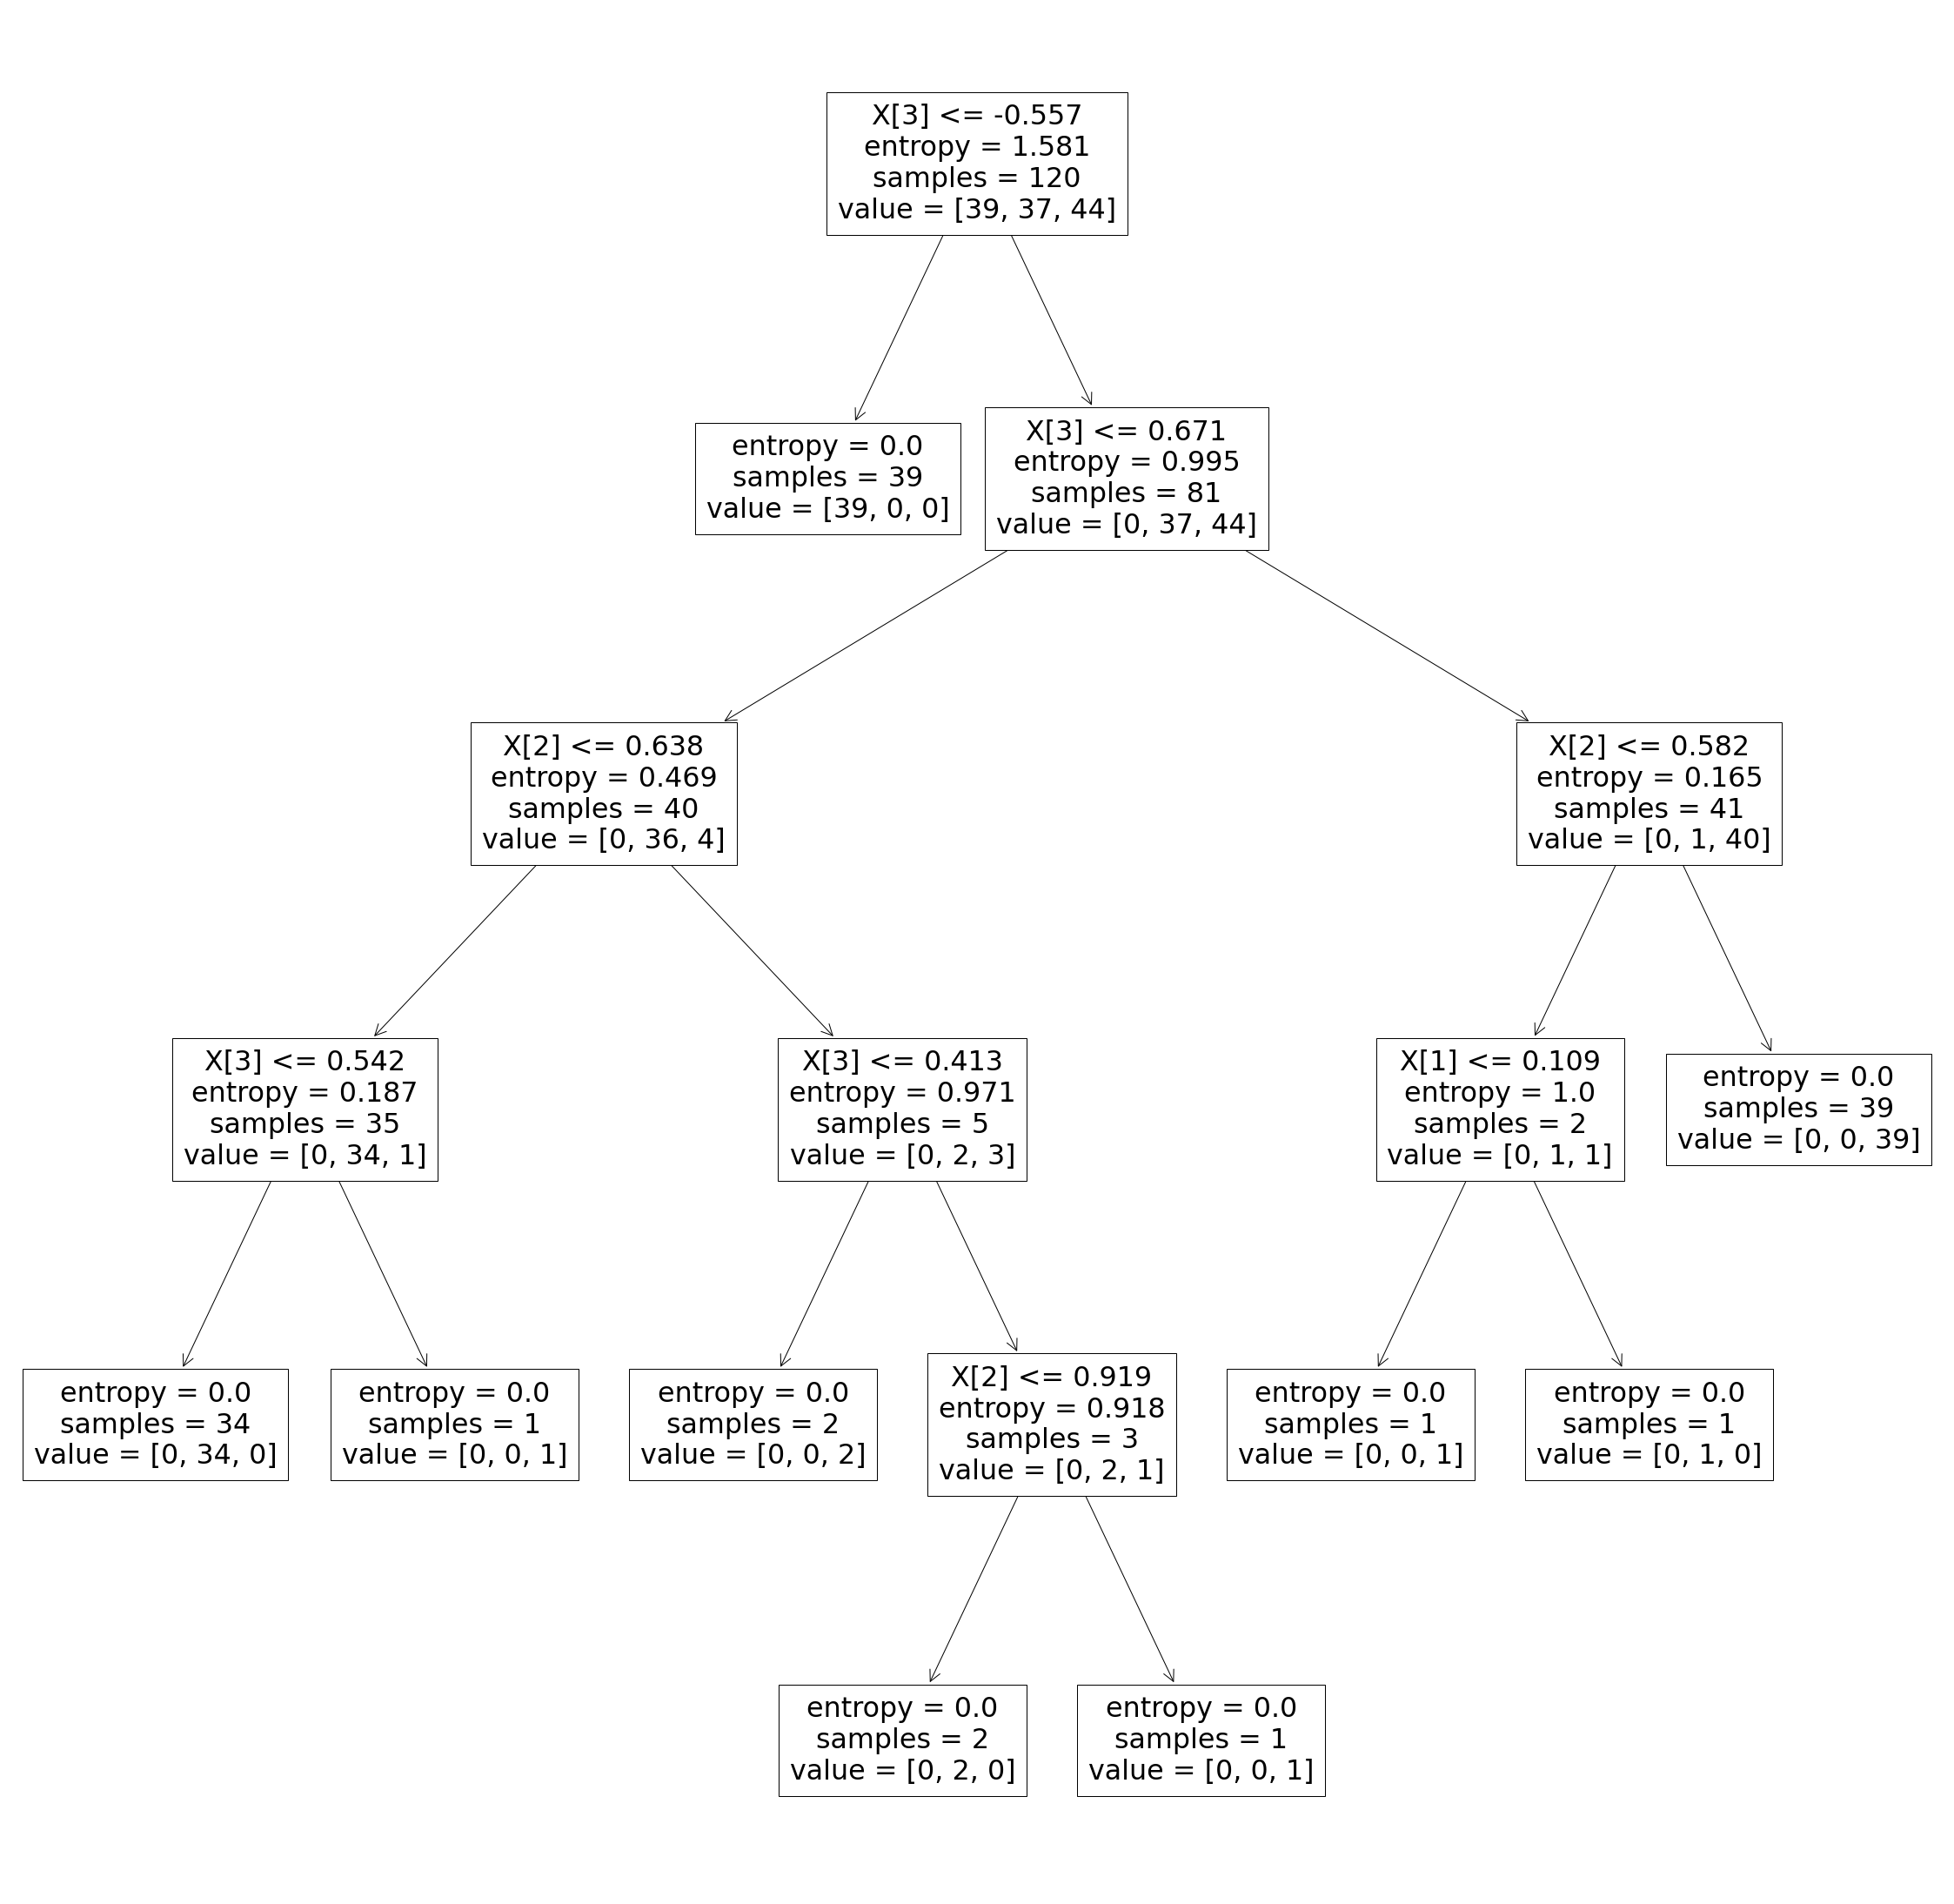

In [ ]:
from sklearn import tree
plt.figure(figsize=(40,40))
tree.plot_tree(classifier);


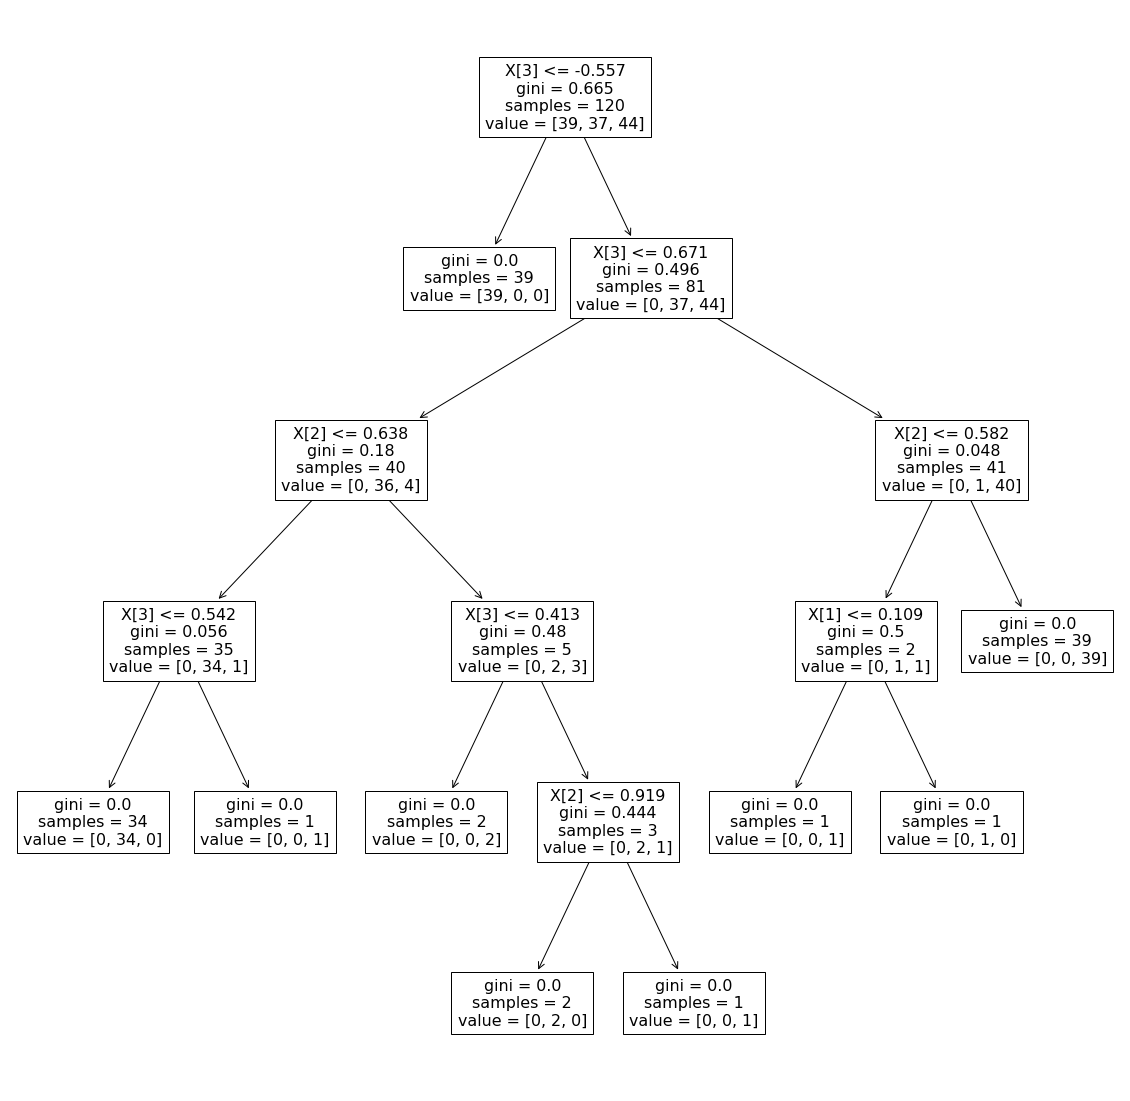

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(classifiergini);

## Naive Bayes Classifier ##

In [ ]:
X= data.iloc[:,1:5]
y=data.iloc[:,-1]

In [ ]:
# Label encoding the categorical data #
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y=labelencoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [ ]:
# feature scaling                      
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # when you are going to learn only then you will use fit 
X_test = sc.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])

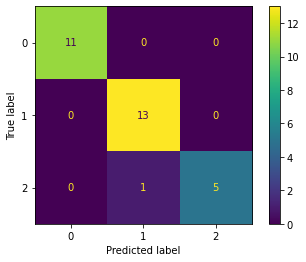

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test) 
plt.show()

In [ ]:
from sklearn import metrics
prediction = metrics.accuracy_score(y_test,y_pred)
print("Accuracy : " , prediction * 100 , "%")

Accuracy :  96.66666666666667 %


## Logistic Regression ##

In [ ]:
X= data.iloc[:,1:5]
y=data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# feature scaling                      
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # when you are going to learn only then you will use fit 
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

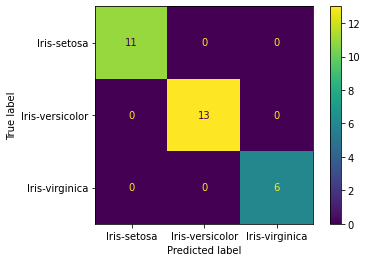

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test) 
plt.show()

In [ ]:
from sklearn import metrics
prediction = metrics.accuracy_score(y_test,y_pred)
print("Accuracy : " , prediction * 100 , "%")

Accuracy :  100.0 %


## Knn Classifier ##

In [ ]:
X= data.iloc[:,1:5]
y=data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# feature scaling                      
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # when you are going to learn only then you will use fit 
X_test = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski',p=2) # p = 2 means euclidian distance p=1 is manhaton distance
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])

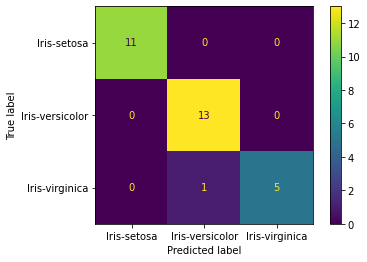

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test) 
plt.show()

In [ ]:
from sklearn import metrics
prediction = metrics.accuracy_score(y_test,y_pred)
print("Accuracy : " , prediction * 100 , "%")

Accuracy :  96.66666666666667 %


## Naive Bayes model and apply PAC ##

We want 97% accuracy for learning with error rate let say less than 0.14

m >= 1/e (ln(|H| + ln(1/delta)))

|H| = 761530  

 delta = 0.03
 
 e = <0.14 

In [ ]:
# here we have 3 target concepts i.e 
#'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
# and 150 samples 

In [ ]:
m = (math.log(761530,2.718)+math.log(1/0.03,2.718))/0.14

In [ ]:
m

121.79579076342789

So m value we take around  122 samples for our accuracy to be 97% 
so we split the data in that format

In [ ]:
data_split = 1 - (122/150) 

In [ ]:
data_split

0.18666666666666665

In [ ]:
X= data.iloc[:,1:5]
y=data.iloc[:,-1]

In [ ]:
# Label encoding the categorical data #
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y=labelencoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1867,random_state=0)

In [ ]:
# feature scaling                      
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # when you are going to learn only then you will use fit 
X_test = sc.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])

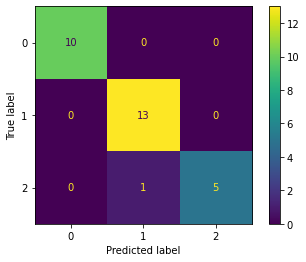

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test) 
plt.show()

In [ ]:
from sklearn import metrics
prediction = metrics.accuracy_score(y_test,y_pred)
print("Accuracy : " , prediction * 100 , "%")

Accuracy :  96.55172413793103 %


## RandomForest Classifier ##

In [ ]:
X= data.iloc[:,1:5]
y=data.iloc[:,-1]

In [ ]:
# Label encoding the categorical data #
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y=labelencoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# feature scaling                      
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # when you are going to learn only then you will use fit 
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50 , random_state = 0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)


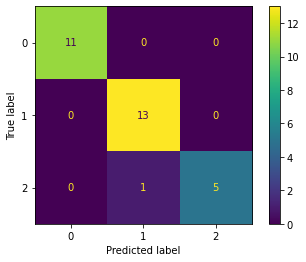

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test) 
plt.show()

In [ ]:
from sklearn import metrics
prediction = metrics.accuracy_score(y_test,y_pred)
print("Accuracy : " , prediction * 100 , "%")

Accuracy :  96.66666666666667 %


## Ada Boost ##

In [ ]:
X= data.iloc[:,1:5]
y=data.iloc[:,-1]

In [ ]:
# Label encoding the categorical data #
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y=labelencoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(base_estimator = classifier, n_estimators = 100 , random_state = 0)
Ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                   learning_rate=1.0, n_estimators=100, random_state=0)

In [ ]:
y_pred_ada = Ada.predict(X_test)

In [ ]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_ada)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [ ]:
from sklearn import metrics
prediction = metrics.accuracy_score(y_test,y_pred_ada)
print("Accuracy : " , prediction * 100 , "%")

Accuracy :  100.0 %


# 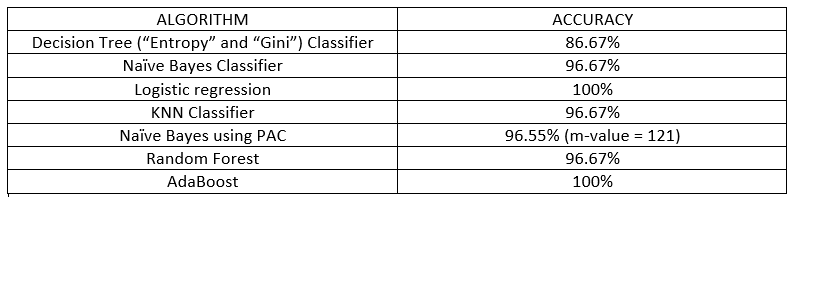

# PART 2 #

Develop a linear regression using house price prediction dataset from UCI repository

In [ ]:
import pandas as pd
import numpy as np
# from sklearn import metrics
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

In [ ]:
data = pd.read_csv("USA_Housing.csv")

In [ ]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
X = data.iloc[:,0:5]
y=data.iloc[:,5]

In [ ]:
X.shape

(5000, 5)

In [ ]:
y.shape

(5000,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)
regressor.score(X_test,y_test)

0.9146454505137889

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


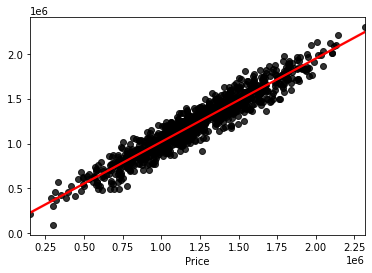

In [ ]:
sns.regplot(y_test, y_pred, scatter_kws={"color": "black"}, line_kws={"color": "red"});

# PART 3 #

Part-3: using Numeric, Pandas and other Python libraries

- Write the Python code to compute entropy and information gain
- Write the  Python code to demonstrate conditional probability
- Write the  Python code to compute Euclidean Distance between data points
- Write the  Python code to calculate covariance matrix, Eigen values and Eigen  vectors
-Write the  Python code to calculate the following
  
  Accuracy e

 Misclassification 

 Type-1 and Type-2 error rates

 Sensitivity

 Specificity

## Write the Python code to compute entropy and information gain ##

In [ ]:
os.chdir('/content/drive/My Drive/Colab Notebooks/Data/')
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Data'

In [ ]:
import os
import pandas as pd
import numpy as np

dataset=pd.read_csv('dataset.csv')
dataset.head()
target_col = dataset.iloc[:,-1]

In [ ]:
dataset

,outlook,temperature,humidity,wind,answer
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes
5,rain,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rain,mild,normal,weak,yes


In [ ]:
def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

In [ ]:
ent = entropy(target_col)

In [ ]:
ent

0.9402859586706309

In [ ]:
def InfoGain(data,split_attribute_name,target_name="answer"):
    total_entropy = entropy(data[target_name])    
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain

In [ ]:
info_outlook = InfoGain(dataset,"outlook","answer")

In [ ]:
info_temp = InfoGain(dataset,"temperature","answer")

In [ ]:
info_humidity = InfoGain(dataset,"humidity",'answer')

In [ ]:
info_wind = InfoGain(dataset,"wind",'answer')

In [ ]:
print(" Info gain of Outlook:{} \n Info gain of Temperature:{} \n Info gain of Humidity:{} \n Info gain of Wind:{}".format(info_outlook,info_temp,info_humidity,info_wind))

 Info gain of Outlook:0.2467498197744391 
 Info gain of Temperature:0.029222565658954647 
 Info gain of Humidity:0.15183550136234136 
 Info gain of Wind:0.04812703040826927


## Write the Python code to demonstrate conditional probability ##

In [ ]:
collection = {"company": ["ford", "chevy", "ford", "ford", "ford", "toyota"],
              "model": ["mustang", "camaro", "fiesta", "focus", "taurus", "camry"],
              "rating": ["A", "B", "C", "A", "B", "B"],
              "type": ["coupe", "coupe", "sedan", "sedan", "sedan", "sedan"]}

df = pd.DataFrame(collection)

In [ ]:
df


,company,model,rating,type
0,ford,mustang,A,coupe
1,chevy,camaro,B,coupe
2,ford,fiesta,C,sedan
3,ford,focus,A,sedan
4,ford,taurus,B,sedan
5,toyota,camry,B,sedan


probability of P(rating/type) 

In [ ]:
df_s = df.groupby('rating')['type'].value_counts() / df.groupby('rating')['type'].count()
df_f = df_s.reset_index(name='cpt')
df_f.head()  # your conditional probability table

,rating,type,cpt
0,A,coupe,0.500000
1,A,sedan,0.500000
2,B,sedan,0.666667
3,B,coupe,0.333333
4,C,sedan,1.000000


## Write the Python code to compute Euclidean Distance between data points ##

In [ ]:
import math

In [ ]:
data = {"Name":["Type-1","Type-2","Type-3","Type4"],
      "Acid Durability":[7,7,3,1],
      "Acid Strength":[7,4,4,4],
      "Class":["Bad","Bad","Good","Good"]}

In [ ]:
data

{'Acid Durability': [7, 7, 3, 1],
 'Acid Strength': [7, 4, 4, 4],
 'Class': ['Bad', 'Bad', 'Good', 'Good'],
 'Name': ['Type-1', 'Type-2', 'Type-3', 'Type4']}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,Name,Acid Durability,Acid Strength,Class
0,Type-1,7,7,Bad
1,Type-2,7,4,Bad
2,Type-3,3,4,Good
3,Type4,1,4,Good


In [ ]:
test_data = {"Name":["Type-5"],
             "Acid Durability":[3],
             "Acid Strength":[7]}

In [ ]:
dftest=pd.DataFrame(test_data) 

In [ ]:
dftest

,Name,Acid Durability,Acid Strength
0,Type-5,3,7


In [ ]:
distance=[]
for i in range(len(df)):
  dist=math.sqrt((df.iloc[i,1]-dftest.iloc[0,1])**2 + (df.iloc[i,2]-dftest.iloc[0,2])**2)
  distance.append(dist)



In [ ]:
df["distance"]=distance

In [ ]:
df

,Name,Acid Durability,Acid Strength,Class,distance
0,Type-1,7,7,Bad,4.000000
1,Type-2,7,4,Bad,5.000000
2,Type-3,3,4,Good,3.000000
3,Type4,1,4,Good,3.605551


## Write the Python code to calculate covariance matrix, Eigen values and Eigen vectors ##

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
x = np.array([10,39,19,23,28])
y = np.array([43,13,32,21,20])

In [ ]:
cov = np.cov(x,y)
cov   # covariance matrix

array([[ 115.7 , -120.55],
       [-120.55,  138.7 ]])

In [ ]:
eigen_values,eigen_vectors = np.linalg.eig(cov) 

In [ ]:
eigen_values

array([  6.10271473, 248.29728527])

In [ ]:
eigen_vectors

array([[-0.73992059,  0.67269422],
       [-0.67269422, -0.73992059]])

## Write the Python code to calculate the following

 Accuracy e

 Misclassification

 Type-1 and Type-2 error rates

 Sensitivity

 Specificity

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
X = dataset.iloc[:,[2,3]].values  # X is a matrix
y=dataset.iloc[:,4].values  # y is an array

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
# feature scaling                      
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # when you are going to learn only then you will use fit 
X_test = sc.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[65,  3],
       [ 7, 25]])

In [ ]:
diag = np.diag(cm)

In [ ]:
total = np.sum(cm)

In [ ]:
total

100

In [ ]:
correct_pred=np.sum(diag)

In [ ]:
correct_pred

90

### Accuracy ###

In [ ]:
accuracy = (correct_pred/total)*100

In [ ]:
print("Accuracy = {}%".format(accuracy))

Accuracy = 90.0%


### Misclassify ##

In [ ]:
miss = total - correct_pred

In [ ]:
misclassify = (miss/total)*100
print("Misclassification = {}%".format(misclassify)) 

Misclassification = 10.0%


### Type 1 and Type 2 error rate ###

In [ ]:
error = np.diag(np.fliplr(cm))

In [ ]:
error

array([3, 7])

In [ ]:
Type1error = error[0]
Type2error = error[1]

In [ ]:
print(" Type 1 error = {} \n Type 2 error = {}".format(Type1error,Type2error))

 Type 1 error = 3 
 Type 2 error = 7


In [ ]:
error_rate = ((Type1error+Type2error)/total)*100

In [ ]:
print("Erroe rate = {}%".format(error_rate)) 

Erroe rate = 10.0%


###  Sensitivity ###
### Sensitivity = (True Positive)/(True Positive + False Negative) ###

In [ ]:
True_positive = diag[1]

In [ ]:
False_negative = error[1]

In [ ]:
Sensitivity = (True_positive)/(True_positive+False_negative)

In [ ]:
print("Sensitivity = {}".format(Sensitivity))

Sensitivity = 0.78125


### Specificity 
### Specificity = (True Negative)/(True Negative + False Positive)

In [ ]:
True_negative = diag[0]
False_positive = error[0]

In [ ]:
Specificity = (True_negative)/(True_negative+False_positive)

In [ ]:
print("Specificity = {}".format(Specificity))

Specificity = 0.9558823529411765
